# Cusomization

## 

## Importing and Cleaning Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# loading data set
dataset1 = load_dataset('lukebarousse/data_jobs')
dataf = dataset1['train'].to_pandas()
df = dataf.copy()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [3]:
df_DS = df[df['job_title_short']=='Data Scientist'].copy()

### df[Data Analyst] 
df_DA

In [ ]:
#Create new columns for month number
df_DA['month_number'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills columns and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_piv = df_DA_explode.pivot_table(index='month_number',columns='job_skills',aggfunc='size',fill_value=0)

In [ ]:
# Sort the skills by count
df_DA_piv.loc['Total'] = df_DA_piv.sum()
df_DA_piv = df_DA_piv[df_DA_piv.loc['Total'].sort_values(ascending=False).index]
df_DA_piv = df_DA_piv.drop('Total')

In [ ]:
df_DA_piv

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
month_number,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_DA_piv.reset_index(inplace=True)

In [ ]:
#use month name for plotting
df_DA_piv['job_posted_month'] = df_DA_piv['month_number'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%B'))
df_DA_piv.set_index('job_posted_month', inplace=True)
df_DA_piv.drop(columns='month_number', inplace=True)

In [ ]:
df_DA_piv

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
September,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


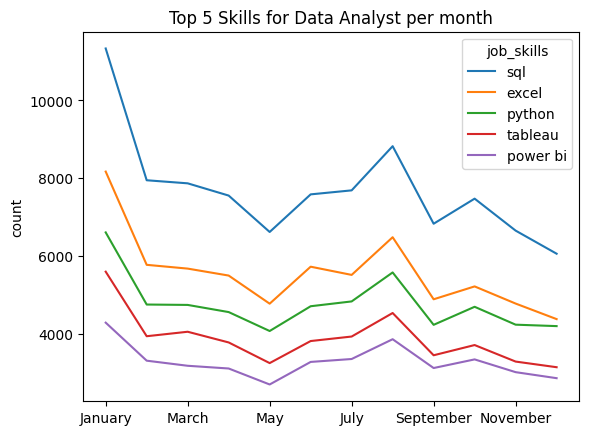

In [ ]:
# Get Top 5 skills visualization
df_DA_piv.iloc[:,:5].plot(kind='line')

plt.title('Top 5 Skills for Data Analyst per month')
plt.ylabel('count')
plt.xlabel('')
plt.show()

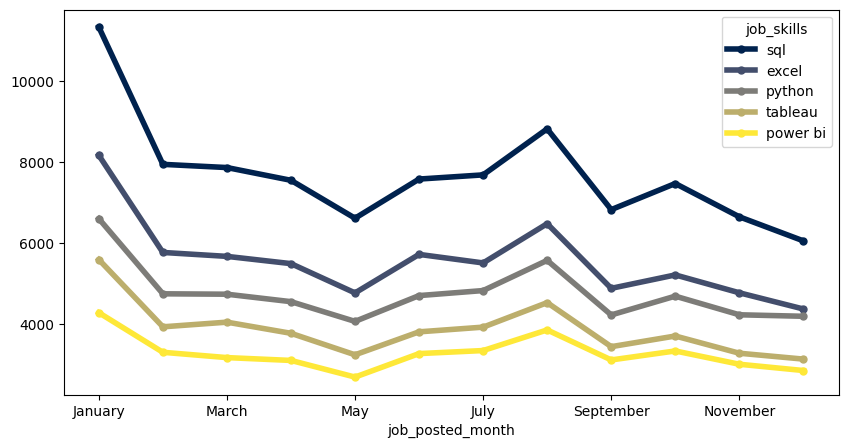

In [ ]:
df_DA_piv.iloc[:, :5].plot(
    kind='line',
    colormap='cividis', #'viridis','plasma','magma','inferno','cividis'
    linewidth=4,
    linestyle='-',# '-','--',':','-.'
    marker='o', # 'o','x','*','+','s','.','1','2','3',.......
    markersize = 5,
    figsize=(10,5))

plt.show()

### Data Scientist
df_DS

In [4]:
# Create new columns for month number
df_DS['month_number'] = df_DS['job_posted_date'].dt.month

# Explode the job_skills columns and pivot
df_DS_explode=df_DS.explode('job_skills')
df_DS_piv = df_DS_explode.pivot_table(index='month_number',columns='job_skills',aggfunc='size',fill_value=0)

In [5]:
# Sort the skills by count
df_DS_piv.loc['total'] = df_DS_piv.sum()
df_DS_piv=df_DS_piv[df_DS_piv.loc['total'].sort_values(ascending=False).index]
df_DS_piv = df_DS_piv.drop('total')

In [6]:
df_DS_piv

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,wimi,shogun,mattermost,nuxt.js,sqlserver
month_number,,,,,,,,,,,,,,,,,,,,,
1,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
2,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
3,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,1,0,0,0
4,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
5,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
6,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
7,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
8,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
9,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


In [7]:
df_DS_piv.reset_index(inplace=True)
df_DS_piv['job_posted_month'] = df_DS_piv['month_number'].apply(lambda x:pd.to_datetime(x,format='%m').strftime('%B'))
df_DS_piv.set_index('job_posted_month',inplace=True)
df_DS_piv.drop(columns='month_number',inplace=True)

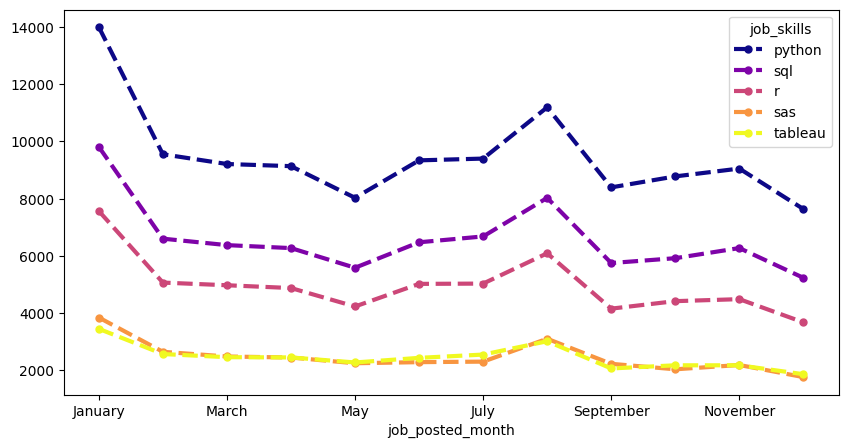

In [11]:
df_DS_piv.iloc[:,:5].plot(
    kind='line',
    linestyle = '--',
    linewidth=3,
    marker='o',
    markersize = 5,
    colormap= 'plasma',
    figsize=(10,5)
    )

plt.show()

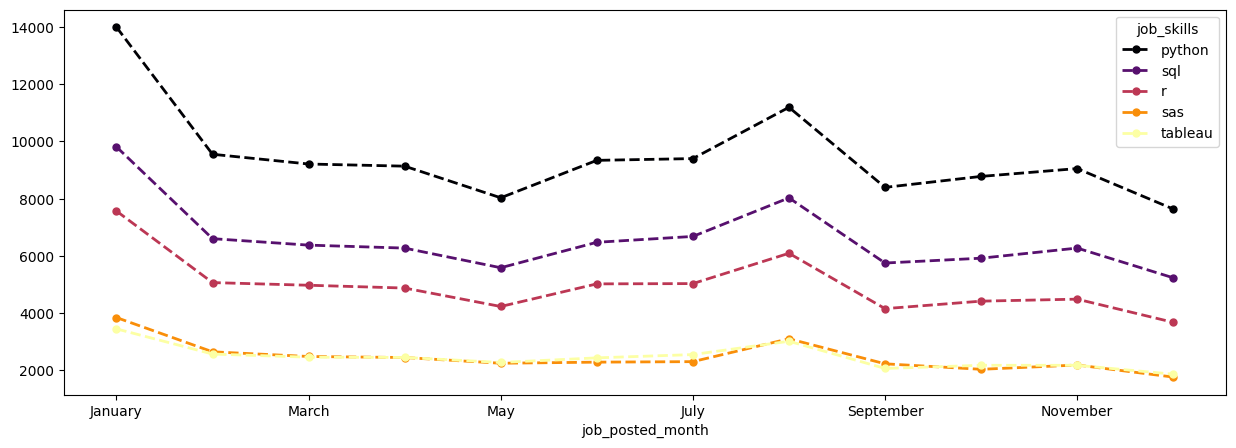

In [10]:
df_DS_piv.iloc[:, :5].plot(
    kind='line',
    linestyle='--',
    linewidth=2,
    marker='o',
    markersize=5,
    colormap='inferno',
    figsize=(15, 5)
)

plt.show()

### Adjust text

In [ ]:
from adjustText import adjust_text

In [ ]:
df1 = df[df['job_title_short'] == 'Data Scientist']
df1_exploded = df1.explode('job_skills')
skill_state = df1_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'), median_salary=('salary_year_avg', 'median')
)
skill_state = skill_state.sort_values(
    by='skill_count', ascending=False).head(20)
skill_state

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


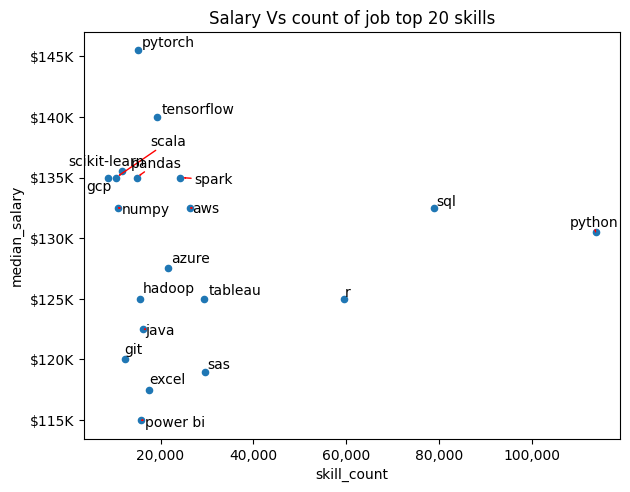

In [ ]:

skill_state.plot(kind='scatter', x='skill_count', y='median_salary')

texts=[]
for i, txt in enumerate(skill_state.index):
    texts.append(plt.text(skill_state['skill_count'].iloc[i],skill_state['median_salary'].iloc[i], txt))

adjust_text(texts,arrowprops=dict(arrowstyle='->',color='red'))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f"{int(x/1000)},000"))

plt.tight_layout()
plt.title('Salary Vs count of job top 20 skills')
plt.show()